In [1]:
'''THis block of code pre processes the data'''
from nltk.stem import WordNetLemmatizer
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
lemmatizer = WordNetLemmatizer()
from nltk.tokenize import word_tokenize,sent_tokenize

import csv
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = 'Data_mesh_publications.csv'

# Read the TSV file and convert it to a DataFrame
df = pd.read_csv(file_path, delimiter=',')
df

,Filename,Content,Publisher,Year,Publication_type
0,Breaking Down Data Silos Data Mesh to Achieve ...,Abstract— Data localization laws...,IEEE,2023,conference
1,Decentralized Data Governance as Part of a Dat...,Abstract —Data mesh is a socio-technical ...,IEEE,2023,conference
2,Enterprise Data Strategy A Decentralized Data ...,Abstract— As the enterprises experience expone...,IEEE,2022,conference
3,Finding Your Way Through the Jungle of Big Dat...,Abstract—This paper presents a systematic revi...,IEEE,2021,conference
4,CoK A Survey of Privacy Challenges in Relation...,. The growing volumes of data that appear on m...,Springer,2022,conference
5,Converging Data Mesh and Microservice Principl...,. Companies have invested in Domain-Driven Des...,Springer,2023,conference
6,Data Integration Revitalized From Data Warehou...,". For years, data integration (DI) architectur...",Springer,2023,conference
7,Data Mesh as Distributed Data Platform for Lar...,. Rapid increase in data volume during the las...,Springer,2023,conference
8,Data Fabric and Data Mesh Approaches with AI,"When you look back in time, data architectures...",Springer,2023,book
9,Cow Mesh a data-mesh architecture to unify dai...,Dairy is an economically signiﬁcant industry t...,ResearchGate,2023,journal


In [3]:
# Load stop words from NLTK library
nltk.download('wordnet')
nltk.download("stopwords")
nltk_stop_words = set(stopwords.words('english'))
print("Number of stop words from NLTK:", len(nltk_stop_words))

# Load stop words from CSV file into a DataFrame with the appropriate encoding
csv_file_path = "Data_mesh_stop_words.csv"
words_df = pd.read_csv(csv_file_path, header=None, names=["stopword"], encoding="ISO-8859-1")
custom_stop_words = set(map(str.lower, words_df["stopword"]))

# Combine stop words from both sources
stop_words = nltk_stop_words.union(custom_stop_words)

# Add words from CSV file to stop_words set
with open(csv_file_path, mode='r') as file:
    reader = csv.reader(file)
    # Skip header
    next(reader, None)
    # Add words to stop_words set
    for row in reader:
        word = row[0].lower().strip()
       
        stop_words.add(word)

Number of stop words from NLTK: 179


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mondal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mondal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
words_to_check = ['http', 'com', 'author','license' ]

# Check if each word is in stop_words, and if not, add it
for word in words_to_check:
    if word not in stop_words:
        print(f"Adding '{word}' to stop_words")
        stop_words.add(word)

# Print the updated stop_words set
print("Updated stop words set:", stop_words, len(stop_words))

Updated stop words set: {'podlesny\xa0', 'use', 'for', 'wiley', 'any', 'our', "mightn't", 'you', 'don', 'preprints\xa0', "weren't", 'against', 'by', 'note', 'at', 'ation', 'yourself', 'what', 'chapter', 'whom', 'other', "won't", 'worapol', 'peer', 'scientific', 'these', 'er', 'enterprise', 'too', 'analysis', 'url', "wouldn't", 'them', 'mf', "doesn't", 'now', 'ain', 'literature', "that'll", 'author', 'own', 'having', 'available', 'can', 'detection', 'lncs', 'conference', 'dama', 'had', 'shouldn', "haven't", 'hers', 'committee', "don't", 'pp', 'preprints', 'on', 'cited', 'org', 'themselves', 'aren', 'an', "didn't", 'did', 'below', "she's", 'd', 'result', 'am', 'discussion', 'hasn', 'their', ' factor', 'time', 'm', 'http', 'both', 'figure', 'hochschule', 'background', "needn't", 'xplore', 'used', 'addressed', 'doi', "you've", 'to', 'springer', 'out', 'information', "wasn't", 'www', 'll', 'interviewee', 'need', 'he', 're', 'also', 'him', 'yours', 'organization', 'trying', 'got', 'the', 'li

In [5]:
def clean_text(text):
    
    # Remove HTML tags and non-English characters
    text = re.sub(r"<[^>]+>", "", str(text))
    text = re.sub(r"[^A-Za-zÀ-ž ]", " ", str(text))

    # Tokenize and convert to lowercase
    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]

    # Remove single characters and numbers
    words_filtered = [word for word in words_tokens_lower if len(word) > 1 and not word.isnumeric()]

    # Remove stop words
    words_filtered = [word for word in words_filtered if word not in stop_words]

    # Lemmatize words
    words_lemmatized = [lemmatizer.lemmatize(word) for word in words_filtered]

    # Join the words back into a string
    text_clean = " ".join(words_lemmatized)
    return text_clean


In [6]:
pdf_data = df.dropna(axis = 0, how = 'any', inplace = False)
    
# pdf_data = df.copy()
# drop_nan(pdf_data)
pdf_data['Content'] = pdf_data['Content'].apply(clean_text)


In [7]:
pdf_data

,Filename,Content,Publisher,Year,Publication_type
0,Breaking Down Data Silos Data Mesh to Achieve ...,abstract data localization law becoming make h...,IEEE,2023,conference
1,Decentralized Data Governance as Part of a Dat...,abstract data socio technical decentralized an...,IEEE,2023,conference
2,Enterprise Data Strategy A Decentralized Data ...,abstract enterprise experience exponential gro...,IEEE,2022,conference
3,Finding Your Way Through the Jungle of Big Dat...,abstract paper present systematic ofcommon ana...,IEEE,2021,conference
4,CoK A Survey of Privacy Challenges in Relation...,growing volume data appear multiple dis tribut...,Springer,2022,conference
5,Converging Data Mesh and Microservice Principl...,company invested driven design sup port data d...,Springer,2023,conference
6,Data Integration Revitalized From Data Warehou...,year data integration architecture evolved fro...,Springer,2023,conference
7,Data Mesh as Distributed Data Platform for Lar...,rapid increase data volume last decade promote...,Springer,2023,conference
8,Data Fabric and Data Mesh Approaches with AI,look back data architecture developed response...,Springer,2023,book
9,Cow Mesh a data-mesh architecture to unify dai...,dairy economically signi cant industry caters ...,ResearchGate,2023,journal


In [8]:
df_subset = pdf_data[['Filename','Publisher','Year','Publication_type']]
df_subset_sorted = df_subset.sort_values(by='Year', ascending=True)
df_subset_sorted
print(df_subset_sorted.to_latex(index=False))

\begin{tabular}{llrl}
\toprule
Filename & Publisher & Year & Publication_type \\
\midrule
Utilization of Data Mesh Framework as a Part of Organization's Data Management & miscellaneous & 2021 & master thesis \\
Finding Your Way Through the Jungle of Big Data Architectures & IEEE & 2021 & conference \\
Data Mesh Concepts and Principles of a Paradigm Shift in Data Architectures & Elsevier & 2021 & conference \\
Enterprise Data Strategy A Decentralized Data Mesh Approach & IEEE & 2022 & conference \\
CoK A Survey of Privacy Challenges in Relation to Data Meshes & Springer & 2022 & conference \\
Identifying Alternatives and Deciding Factors for a Data Mesh Architecture & ResearchGate & 2022 & conference \\
Introducing Data Mesh paradigm for Smart City platforms design & miscellaneous & 2023 & conference \\
Data Mesh A Holistic Examination Of Its Principles, Practices, And Potential & miscellaneous & 2023 & master thesis \\
A Distributed Data Mesh Paradigm for an Event-based Smart Communiti

In [12]:
# Assuming 'pdf_content' column contains the cleaned text
text_combined = ' '.join(pdf_data['Content'])

# Tokenize the text
tokens = word_tokenize(text_combined)

# Count the frequency of each word
word_freq = nltk.FreqDist(tokens)

# Create a DataFrame from the frequency distribution
word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])

# Sort the DataFrame by frequency in descending order
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)
word_freq_df.head(20)

,Word,Frequency
1,data,208816
143,product,29504
22,architecture,16582
35,organization,9793
293,service,8882
1441,ai,7825
142,domain,7637
11,different,7428
310,ownership,7360
20,new,7016


In [13]:
word_freq_df.head(21)

,Word,Frequency
1,data,208816
143,product,29504
22,architecture,16582
35,organization,9793
293,service,8882
1441,ai,7825
142,domain,7637
11,different,7428
310,ownership,7360
20,new,7016


In [15]:
word_freq_df = word_freq_df[word_freq_df['Word'] != 'data']

c:\Temp\ipykernel_11580\3855662620.py:16: UserWarning: The palette list has more values (50) than needed (20), which may not be intended.
  sns.barplot(x='Word', y='Frequency', data=word_freq_df.head(20), palette=original_palette, hue = 'Word')


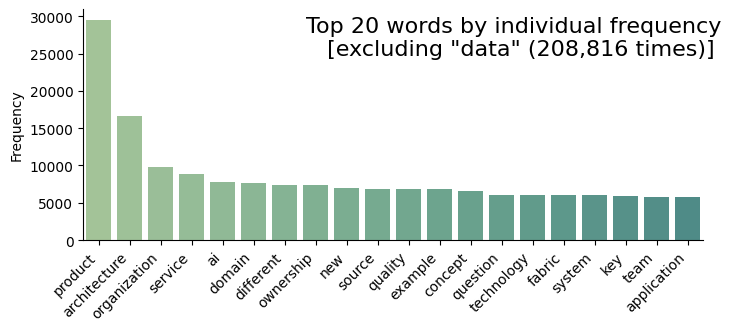

In [16]:
# Plot the top N words by frequency in a bar chart
plt.figure(figsize=(8, 3))

# Choose a Seaborn color palette (e.g., 'flare')
original_palette = sns.color_palette('crest', n_colors=50)

# Invert the color palette
# inverted_palette = sns.color_palette('crest', n_colors=50)[::-1]

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Manually add the title as text inside the plot
plt.text(0.7, 0.8, 'Top 20 words by individual frequency \n [excluding "data" (208,816 times)]', horizontalalignment='center', fontsize=16, transform=plt.gca().transAxes)

sns.barplot(x='Word', y='Frequency', data=word_freq_df.head(20), palette=original_palette, hue = 'Word')
# plt.title('Top 20 words by individual frequency \n [excluding "data"(208,816 times)]')
plt.ylabel('Frequency')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')

# plt.savefig('word_occurrence.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [17]:
pdf_data

,Filename,Content,Publisher,Year,Publication_type
0,Breaking Down Data Silos Data Mesh to Achieve ...,abstract data localization law becoming make h...,IEEE,2023,conference
1,Decentralized Data Governance as Part of a Dat...,abstract data socio technical decentralized an...,IEEE,2023,conference
2,Enterprise Data Strategy A Decentralized Data ...,abstract enterprise experience exponential gro...,IEEE,2022,conference
3,Finding Your Way Through the Jungle of Big Dat...,abstract paper present systematic ofcommon ana...,IEEE,2021,conference
4,CoK A Survey of Privacy Challenges in Relation...,growing volume data appear multiple dis tribut...,Springer,2022,conference
5,Converging Data Mesh and Microservice Principl...,company invested driven design sup port data d...,Springer,2023,conference
6,Data Integration Revitalized From Data Warehou...,year data integration architecture evolved fro...,Springer,2023,conference
7,Data Mesh as Distributed Data Platform for Lar...,rapid increase data volume last decade promote...,Springer,2023,conference
8,Data Fabric and Data Mesh Approaches with AI,look back data architecture developed response...,Springer,2023,book
9,Cow Mesh a data-mesh architecture to unify dai...,dairy economically signi cant industry caters ...,ResearchGate,2023,journal


In [18]:
csv_filename = 'Data_mesh_publications_cleaned.csv'

# Save the DataFrame to a CSV file
pdf_data.to_csv(csv_filename, index=False)

In [19]:
# contains_artificial = pdf_data.applymap(lambda x: 'artificial' in str(x).lower()).any().any()

# print(contains_artificial)

In [20]:
import numpy as np
import networkx as nx
from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.colors as mcolors
import matplotlib.cm as cm

In [21]:
cv = CountVectorizer(ngram_range=(1,1), stop_words='english', max_features=21)
counts_matrix = cv.fit_transform(pdf_data['Content'])

In [22]:
counts_matrix.shape

(21, 21)

In [30]:
counts_matrix.shape

(21, 21)

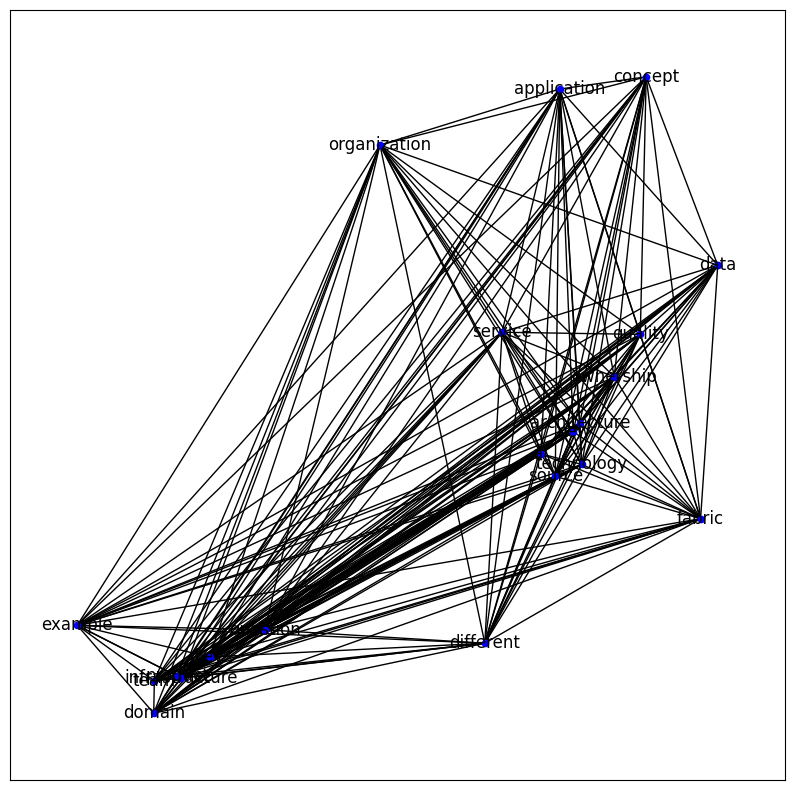

In [23]:
# Get feature names (words)
words = cv.get_feature_names_out()

# Create co-occurrence matrix
co_occurrences = (counts_matrix.T * counts_matrix) 
co_occurrences.setdiag(0) # fill same word cooccurence to 0

# Create co-occurrence DataFrame
co_occurrences_df = pd.DataFrame(co_occurrences.todense(), index=words, columns=words)

# Create graph from the co-occurrence dataframe
G = nx.from_pandas_adjacency(co_occurrences_df)

# You may draw this graph using Networkx draw function or visualize using Gephi by exporting
# nx.write_gexf(G, 'co_occurrences.gexf')

# Draw the network
plt.figure(figsize=(10,10))
nx.draw_networkx(G, with_labels=True, node_size=20, node_color='blue')
plt.show()

# plt.savefig('word_co-occurrence.pdf', format='pdf')

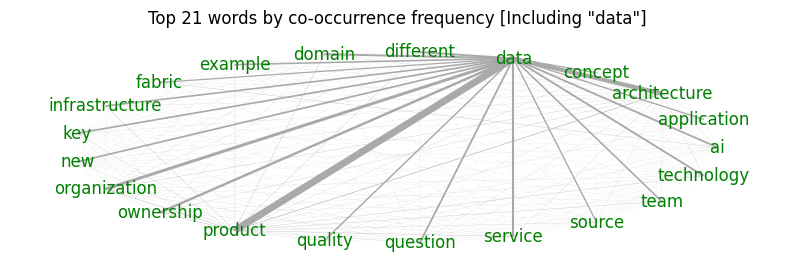

In [24]:
# Get feature names (words)
words = cv.get_feature_names_out()

# Create co-occurrence matrix
co_occurrences = (counts_matrix.T * counts_matrix) 
co_occurrences.setdiag(0) # fill same word cooccurence to 0

# Create co-occurrence DataFrame
co_occurrences_df = pd.DataFrame(co_occurrences.todense(), index=words, columns=words)

# Create graph from the co-occurrence dataframe
G = nx.from_pandas_adjacency(co_occurrences_df)

for (u, v, wt) in G.edges.data('weight'):
    if wt is None:
        G[u][v]['weight'] = co_occurrences_df[u][v]

# Get edge weights for a list
weights = [G[u][v]['weight'] for u,v in G.edges]

# Normalize weights to range 0 to 1 for better visuals
weights = np.array(weights)
weights = (weights / weights.max()) * 5

# Set figure size for the plot
plt.figure(figsize=(10, 3))
plt.title('Top 21 words by co-occurrence frequency [Including "data"]', fontsize = 12)

# Draw nodes
pos = nx.kamada_kawai_layout(G)
nx.draw_networkx_nodes(G, pos, node_color='white', node_size=0)

# Draw edges with thickness representing the weight
nx.draw_networkx_edges(G, pos, width=weights, edge_color='darkgrey')

# Draw node labels
nx.draw_networkx_labels(G, pos, font_size=12, font_color='green')

# Remove the spines (boundary) around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.savefig('word_co-occurrence.pdf', format='pdf', bbox_inches='tight')
plt.show()


In [26]:
co_occurrences_df

,ai,application,architecture,concept,data,different,domain,example,fabric,infrastructure,...,new,organization,ownership,product,quality,question,service,source,team,technology
ai,0,12043211,20978466,6781256,256711333,6181157,2129447,12502613,35380337,2086551,...,12181870,5988870,1962571,13603446,16768032,2793812,12966066,14563627,933774,4127266
application,12043211,0,14330338,5513266,183363330,7966323,6107212,7254190,7960658,3601048,...,8052570,10214055,6062147,18400036,5887511,9082411,7440461,5766906,4134613,5263829
architecture,20978466,14330338,0,13254894,577469860,20536921,22043287,15858989,14231408,17198440,...,18703954,32619178,27136794,73088020,16078606,19086169,22440913,14485561,17169034,21095192
concept,6781256,5513266,13254894,0,183430323,8006003,6201614,7276905,4441322,4816152,...,7055440,10086498,6844586,24096304,4584628,8554326,7340006,5384089,5217584,5430163
data,256711333,183363330,577469860,183430323,0,270421727,274544000,218546170,171850056,222640952,...,240726423,411927277,338567472,971395203,199630829,250666544,289535763,190998626,222756648,261516000
different,6181157,7966323,20536921,8006003,270421727,0,10915486,9468105,3685108,6815091,...,10835703,17412080,11428094,32650700,5948974,14936949,10038866,6319133,7865553,8915607
domain,2129447,6107212,22043287,6201614,274544000,10915486,0,6780646,1246467,8676372,...,8702408,17781461,14536964,37565631,5917733,11446181,10087785,5376430,9197101,10785133
example,12502613,7254190,15858989,7276905,218546170,9468105,6780646,0,8207974,4965370,...,8921344,11288118,6949164,27554925,6507894,10042666,9272240,7457227,5443759,5771512
fabric,35380337,7960658,14231408,4441322,171850056,3685108,1246467,8207974,0,1459990,...,7905942,3568787,1291640,9269131,11507124,1005053,8742320,9945673,550171,2751908
infrastructure,2086551,3601048,17198440,4816152,222640952,6815091,8676372,4965370,1459990,0,...,5165021,12089886,12512591,35328524,4930294,4680155,8617148,4812401,8236513,9174212


In [19]:
# Get all edges data along with the nodes
edges_data = [(u, v, data) for u, v, data in G.edges(data=True)]

# Create a DataFrame from the edges data
edges_df = pd.DataFrame(edges_data, columns=['word1', 'word2', 'data'])

# Extract the weight into a separate column
edges_df['weight'] = edges_df['data'].map(lambda x: x['weight'])

# Drop the 'data' column as it is not needed anymore
edges_df = edges_df.drop('data', axis=1)

# Sort the DataFrame based on 'weight' in descending order
edges_df = edges_df.sort_values(by='weight', ascending=False)

# Get the top 10 edges
top_10_edges = edges_df.head(5)

print(top_10_edges, '\n')
print(top_10_edges.to_latex(index=False))

           word1         word2     weight
83          data       product  971395203
40  architecture          data  577469860
81          data  organization  411927277
82          data     ownership  338567472
86          data       service  289535763 

\begin{tabular}{llr}
\toprule
       word1 &        word2 &    weight \\
\midrule
        data &      product & 971395203 \\
architecture &         data & 577469860 \\
        data & organization & 411927277 \\
        data &    ownership & 338567472 \\
        data &      service & 289535763 \\
\bottomrule
\end{tabular}



C:\Users\sitas\AppData\Local\Temp\ipykernel_1464\978548474.py:20: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(top_10_edges.to_latex(index=False))


In [20]:
# Compute min and max of the 'weight' column
min_weight = edges_df['weight'].min()
max_weight = edges_df['weight'].max()

# Compute normalized weights, (value - min) / (max - min)
edges_df['normalized_weight'] = (edges_df['weight'] - min_weight) / (max_weight - min_weight)

# Get the top 10 edges with normalized weights
top_10_edges_normalized = edges_df.sort_values(by='normalized_weight', ascending=False).head(10)

print(top_10_edges_normalized)

           word1         word2     weight  normalized_weight
83          data       product  971395203           1.000000
40  architecture          data  577469860           0.594245
81          data  organization  411927277           0.423731
82          data     ownership  338567472           0.348168
86          data       service  289535763           0.297664
75          data        domain  274544000           0.282222
74          data     different  270421727           0.277976
89          data    technology  261516000           0.268803
3             ai          data  256711333           0.263854
85          data      question  250666544           0.257627


In [21]:
counts_matrix

<21x21 sparse matrix of type '<class 'numpy.int64'>'
	with 391 stored elements in Compressed Sparse Row format>

In [22]:
# Convert sparse matrix to dense matrix
dense_matrix = counts_matrix.todense()

# Convert dense matrix to DataFrame and assign feature names (words) as index and columns
df1 = pd.DataFrame(dense_matrix, index=words, columns=words)

# Reset index of the data frame to flatten it to a long format
df2 = df1.stack().reset_index()

# Rename the columns
df2.columns = ['word1', 'word2', 'co_occurrence']

# Remove row where both words are the same because these are not valid pairs
df2 = df2[df2['word1'] != df2['word2']]

# Get the top 5 most co-occurring word pairs
top_5_pairs = df2.sort_values(by='co_occurrence', ascending=False).head(20)

print(top_5_pairs)

              word1         word2  co_occurrence
361         service          data          64066
424      technology          data          39430
172          fabric          data          33261
25      application          data          19411
371         service       product           9719
214             key          data           9364
4                ai          data           8691
168          fabric            ai           7179
35      application       product           5872
359         service  architecture           5308
436      technology      question           4446
224             key       product           4422
193  infrastructure          data           4232
370         service     ownership           4201
46     architecture          data           3905
369         service  organization           3783
432      technology  organization           3398
235             new          data           3242
434      technology       product           3116
377         service 